In [1]:
using Pkg
Pkg.activate(".")
Pkg.add(readlines("requirements.txt"))

 Activating environment at `~/Desktop/code/julia/iris/Project.toml`
   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %     ]  84.5 %

  Resolving package versions...
No Changes to `~/Desktop/code/julia/iris/Project.toml`
No Changes to `~/Desktop/code/julia/iris/Manifest.toml`


In [2]:
using GLM
using JSON
using Plots
using Pipe
using DataFrames
using Statistics

In [3]:
data = open("./data/iris.json") do io
    JSON.parse(read(io,String))
end;

In [4]:
columns = reduce(∩,keys.(data))

Set{String} with 5 elements:
  "Sepal.Width"
  "Petal.Length"
  "Petal.Width"
  "Species"
  "Sepal.Length"

In [5]:
df = DataFrame((
        Symbol(replace(c,"." => "")) => getindex.(data,c) 
        for c ∈ columns)...
)
first(df,5)

,SepalWidth,PetalLength,PetalWidth,Species,SepalLength
,Real,Real,Real,String,Real
1,3.5,1.4,0.2,setosa,5.1
2,3,1.4,0.2,setosa,4.9
3,3.2,1.3,0.2,setosa,4.7
4,3.1,1.5,0.2,setosa,4.6
5,3.6,1.4,0.2,setosa,5


In [6]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalWidth,3.05733,2.0,3.0,4.4,0,Real
2,PetalLength,3.758,1.0,4.35,6.9,0,Real
3,PetalWidth,1.19933,0.1,1.3,2.5,0,Real
4,Species,,setosa,,virginica,0,String
5,SepalLength,5.84333,4.3,5.8,7.9,0,Real


In [7]:
@pipe groupby(df,:Species) |> combine(_,nrow => :count)

,Species,count
,String,Int64
1,setosa,50
2,versicolor,50
3,virginica,50


In [8]:
@pipe df |> 
    groupby(_,:Species) |> 
    combine(
        _, 
        :PetalWidth => mean,
        :PetalLength => mean,
        :SepalWidth => mean,
        :SepalLength => mean
    )

,Species,PetalWidth_mean,PetalLength_mean,SepalWidth_mean,SepalLength_mean
,String,Float64,Float64,Float64,Float64
1,setosa,0.246,1.462,3.428,5.006
2,versicolor,1.326,4.26,2.77,5.936
3,virginica,2.026,5.552,2.974,6.588


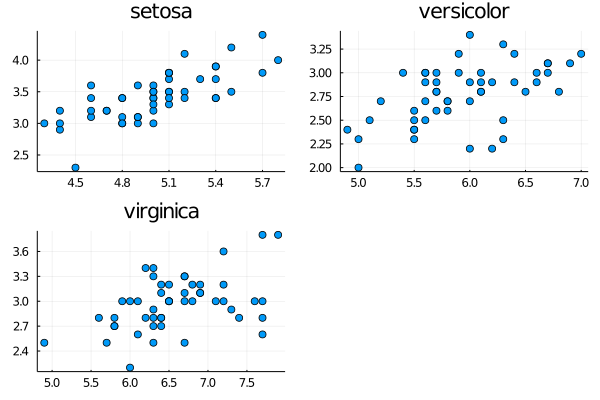

In [48]:
sdfs = ((s,filter(r -> r.Species == s,df))
    for s ∈ unique(df.Species))

plot((scatter(sdf.SepalLength,sdf.SepalWidth,title=s,legend=false) for (s,sdf) ∈ sdfs)...)

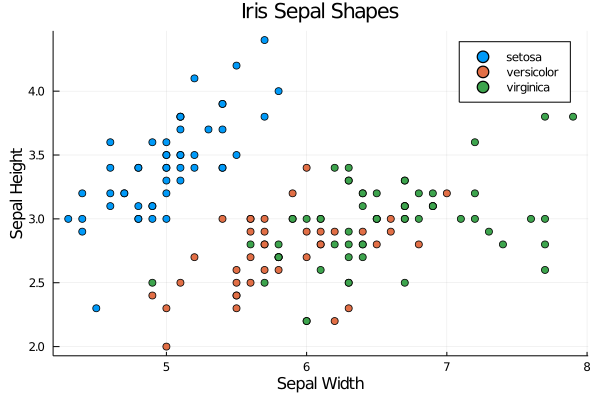

In [55]:
sdfs = ((s,filter(r -> r.Species == s,df))
    for s ∈ unique(df.Species))

p = plot()
for (s, sdf) = sdfs
    scatter!(sdf.SepalLength,sdf.SepalWidth,label=s)
end
plot!(
    title="Iris Sepal Shapes",
    xlabel="Sepal Width",
    ylabel="Sepal Height"
)
display(p)

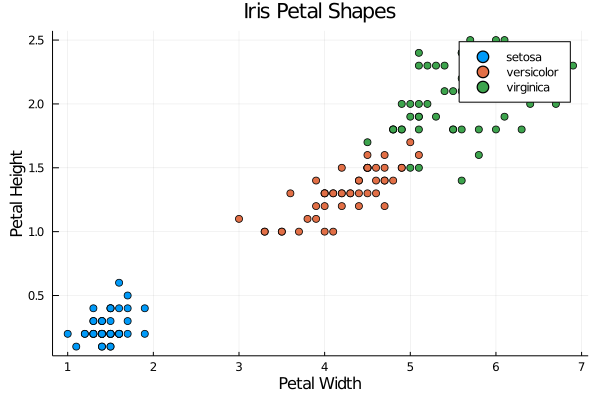

In [57]:
p = plot()
for s = unique(df.Species)
    sdf = filter(r -> r.Species == s,df)
    scatter!(sdf.PetalLength,sdf.PetalWidth,label=s)
end

plot!(
    title="Iris Petal Shapes",
    xlabel="Petal Width",
    ylabel="Petal Height"
)

display(p)